In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [25]:
import torch
import torch.nn as nn

In [26]:
pwd

'/content'

In [27]:
df = pd.read_csv(r'/content/sample_data/NFLX.csv')
print(df.head())
closed_prices = df["Close"]

         Date        Open        High         Low       Close   Adj Close  \
0  2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1  2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2  2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3  2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4  2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   

     Volume  
0  13181000  
1  17284900  
2  17948100  
3  11670000  
4   9689000  


In [28]:
seq_len = 15

In [29]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [30]:
X=[]
Y=[]

In [31]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [32]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [33]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [34]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [35]:
model = Model(1,64)

In [36]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [37]:
loss_fn = nn.MSELoss()

In [38]:
num_epochs=100

In [39]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.13876545
20 epoch loss 0.07117355
30 epoch loss 0.052259672
40 epoch loss 0.026975105
50 epoch loss 0.008326274
60 epoch loss 0.0071486454
70 epoch loss 0.0051429346
80 epoch loss 0.004239484
90 epoch loss 0.0036682626


In [40]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [41]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

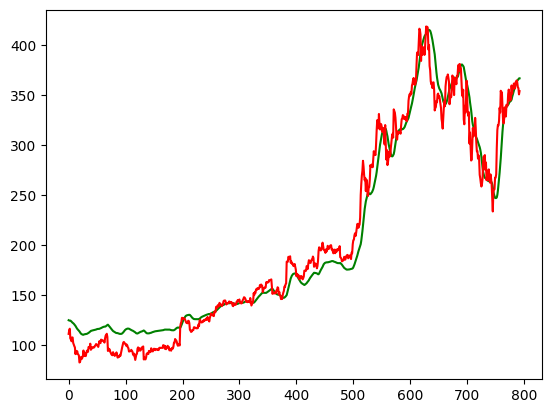

In [42]:
plt.plot(pred.squeeze(),color="green",label="predicted")
plt.plot(real.squeeze(),color="red",label="real")
plt.show()